In [2]:
## Impute using various algorithms & Look at the quality of imputation: 
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

According to some references (listed below), closest match imputation is best for repeated measures data; however, this is really for time series. We can try some other imputation methods as well. <br>
1. mice.impute.2l.lmer - 
2. Closest Match Imputation - mice.impute.pmm() finds matches among the observed data in the predictive mean metric. It selects the donors closest matches, randomly samples one of the donors, and returns the observed value of the match.
3. Predictive Mean Matching

In [3]:
## median imputation: 

In [4]:
library(mice)
library(ggplot2)
library(lattice)
library(Amelia)
library(lme4)
library(miceadds)
library(dplyr)
library(tidyr)
library(lmerTest)
library(multilevel)

Warning message:
“package ‘mice’ was built under R version 3.4.1”Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind

Warning message:
“package ‘Amelia’ was built under R version 3.4.1”Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Loading required package: Matrix
Warning message:
“package ‘miceadds’ was built under R version 3.4.1”* miceadds 2.13-63 (2018-07-05 17:26:53)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:Matrix’:

    expand

The following object is masked from ‘package:

In [5]:
methods(mice)

Warning message in .S3methods(generic.function, class, parent.frame()):
“function 'mice' appears not to be S3 generic; found functions that look like S3 methods”

 [1] mice.1chain                         mice.impute.2l.bin                 
 [3] mice.impute.2l.binary               mice.impute.2l.contextual.norm     
 [5] mice.impute.2l.contextual.pmm       mice.impute.2l.continuous          
 [7] mice.impute.2l.eap                  mice.impute.2l.groupmean           
 [9] mice.impute.2l.groupmean.elim       mice.impute.2l.latentgroupmean.mcmc
[11] mice.impute.2l.latentgroupmean.ml   mice.impute.2l.lmer                
[13] mice.impute.2l.norm                 mice.impute.2l.pan                 
[15] mice.impute.2l.plausible.values     mice.impute.2l.pls                 
[17] mice.impute.2l.pls2                 mice.impute.2l.pmm                 
[19] mice.impute.2lonly.function         mice.impute.2lonly.mean            
[21] mice.impute.2lonly.norm             mice.impute.2lonly.norm2           
[23] mice.impute.2lonly.pmm              mice.impute.2lonly.pmm2            
[25] mice.impute.bygroup                 mice.impute.cart                   

In [6]:
recgli = read.csv('../../ParseData/8thParse_researchPath_withInVivo.csv')

In [7]:
## preparing for imputation using mice: vars <- colnames(dat1)
data.frame(index = 1:length(colnames(recgli)), colnames_recgli = colnames(recgli))
include_vars = colnames(recgli)[c(2, 16:25,32:44,65,67,68,69)]
include_vars

index,colnames_recgli
1,b_number
2,t_number
3,sf_number
4,current_scan_date
5,current_surgery_date
6,current_hist_grade
7,current_hist_type
8,roi.label
9,tumor_cell_evaluation
10,necrosis


[1] "t_number"    "nfse"        "nfl"         "nt1c"        "nt1v"       
 [6] "nadc.1"      "nfa.1"       "nev1.1"      "nev2.1"      "nev3.1"     
[11] "nevrad.1"    "cbvn_nlin"   "phn_nlin"    "phn_npar"    "recovn_npar"
[16] "cni"         "ccri"        "crni"        "ncho"        "ncre"       
[21] "nnaa"        "nlip"        "laclip"      "nlac"        "in_CEL"     
[26] "in_NEL"      "in_NEC"      "in_ROI"

In [7]:
#missmap(recgli, col=c('grey', 'steelblue'), y.cex=0.5, x.cex=0.5)

In [8]:
#sort(sapply(recgli, function(x) { sum(is.na(x)) }), decreasing=TRUE)

In [8]:
include_vars
exclude_vars = setdiff(names(recgli), include_vars)
exclude_vars

[1] "t_number"    "nfse"        "nfl"         "nt1c"        "nt1v"       
 [6] "nadc.1"      "nfa.1"       "nev1.1"      "nev2.1"      "nev3.1"     
[11] "nevrad.1"    "cbvn_nlin"   "phn_nlin"    "phn_npar"    "recovn_npar"
[16] "cni"         "ccri"        "crni"        "ncho"        "ncre"       
[21] "nnaa"        "nlip"        "laclip"      "nlac"        "in_CEL"     
[26] "in_NEL"      "in_NEC"      "in_ROI"

[1] "b_number"                  "sf_number"                
 [3] "current_scan_date"         "current_surgery_date"     
 [5] "current_hist_grade"        "current_hist_type"        
 [7] "roi.label"                 "tumor_cell_evaluation"    
 [9] "necrosis"                  "f8_delicate"              
[11] "f8_simple"                 "f8_complex"               
[13] "mib_1"                     "bx_pure_treatment_effect" 
[15] "nadc.2"                    "nfa.2"                    
[17] "nev1.2"                    "nev2.2"                   
[19] "nev3.2"                    "nevrad.2"                 
[21] "olddata"                   "newdata"                  
[23] "comments"                  "notes."                   
[25] "imaging_code"              "perf_quant"               
[27] "cbv_nlin"                  "spec_quant"               
[29] "include_anat"              "include_diffu1000"        
[31] "include_diffu2000"         "include_diffu_all"        
[33] "include_perf"              "include_spec"             
[35] "include_one_advanced_mod"  "include_all_advanced_mods"
[37] "X.CEL"                     "X.NEL"                    
[39] "X.NEC"                     "sum"                      
[41] "in_T2all"                  "desired_hist"             
[43] "multnom_out"               "no_ffpe"                  
[45] "waiting_on_path"           "rhgg_txe_analysis"

In [9]:
## flair values that we DO have 
nfl_values_observed = !is.na(recgli$nfl)
table(nfl_values_observed)

nfl_values_observed
FALSE  TRUE 
    3   388 

In [10]:
## defining methods that we'd like to try 
methods <- c("sample", "pmm", "2l.pan", "2l.norm", "2l.pmm", "rf")

In [11]:
result <- vector("list", length(methods))
names(result) <- methods

In [12]:
recgli_toimp <- recgli[, c("t_number", "nfse", "nfl", 'nt1c', 'nt1v')]

In [13]:
pred <- make.predictorMatrix(recgli_toimp)
pred

,t_number,nfse,nfl,nt1c,nt1v
t_number,0,1,1,1,1
nfse,1,0,1,1,1
nfl,1,1,0,1,1
nt1c,1,1,1,0,1
nt1v,1,1,1,1,0


In [14]:
pred[,'t_number']=c(0, rep(-2, 4))
pred

,t_number,nfse,nfl,nt1c,nt1v
t_number,0,1,1,1,1
nfse,-2,0,1,1,1
nfl,-2,1,0,1,1
nt1c,-2,1,1,0,1
nt1v,-2,1,1,1,0


In [16]:
methods <- c("sample", "pmm", "2l.pan", "2l.norm", "2l.pmm", "rf")
for (meth in methods) {
  d <- recgli_toimp[, c("t_number", "nfse", "nfl", 'nt1c', 'nt1v')]
  pred <- make.predictorMatrix(d)
  pred[,'t_number']=c(0, rep(-2, 4))
  result[[meth]] <- mice(d, pred = pred, meth = meth,
                         m = 10, maxit = 2,
                         print = FALSE, seed = 1)
}

In [17]:
sample.result = result[['sample']]
pmm.result = result[['pmm']]
pan2l.result = result[['2l.pan']]
pmm2l.result = result[['2l.pmm']]
norm2l.result = result[['2l.norm']]
rf.result = result[['rf']]



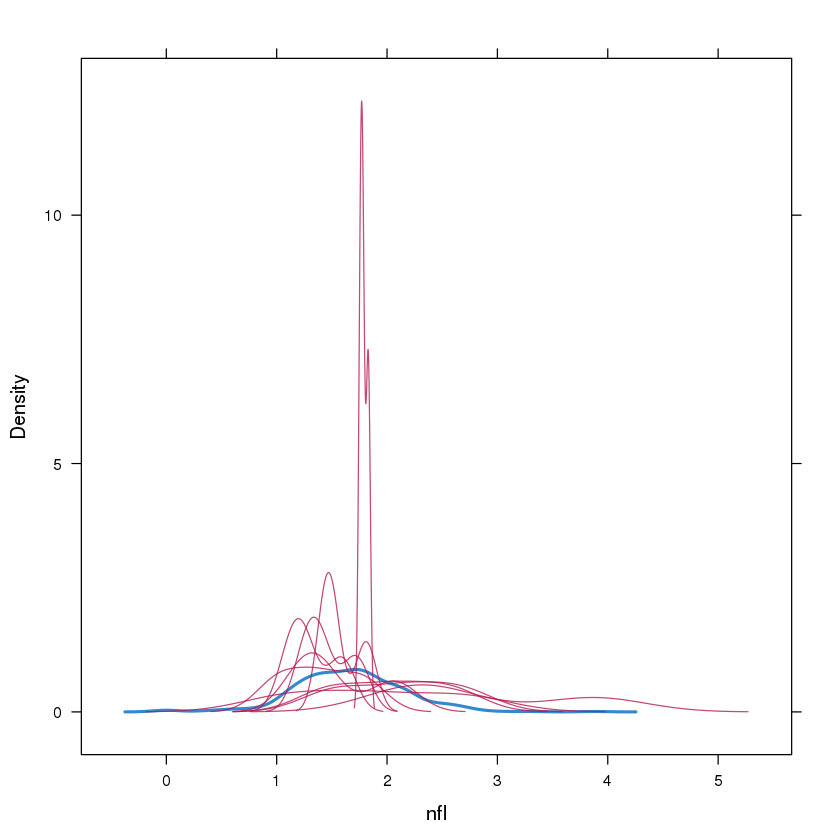

In [25]:
densityplot(sample.result, ~nfl)
## this one by far looks the best, but should probably go by t1c b/c way more to impute

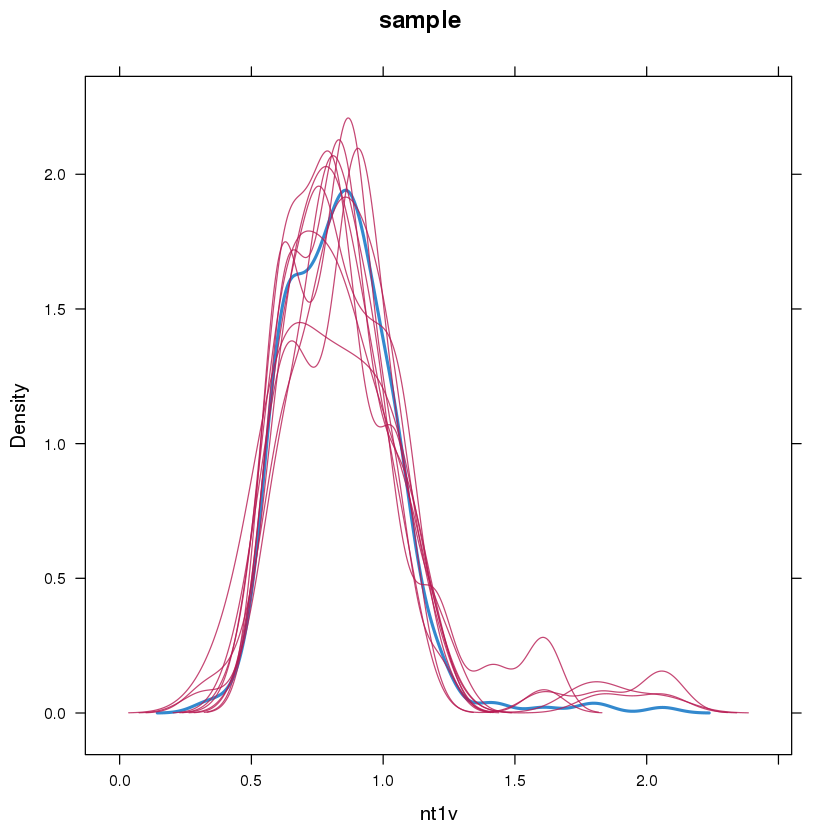

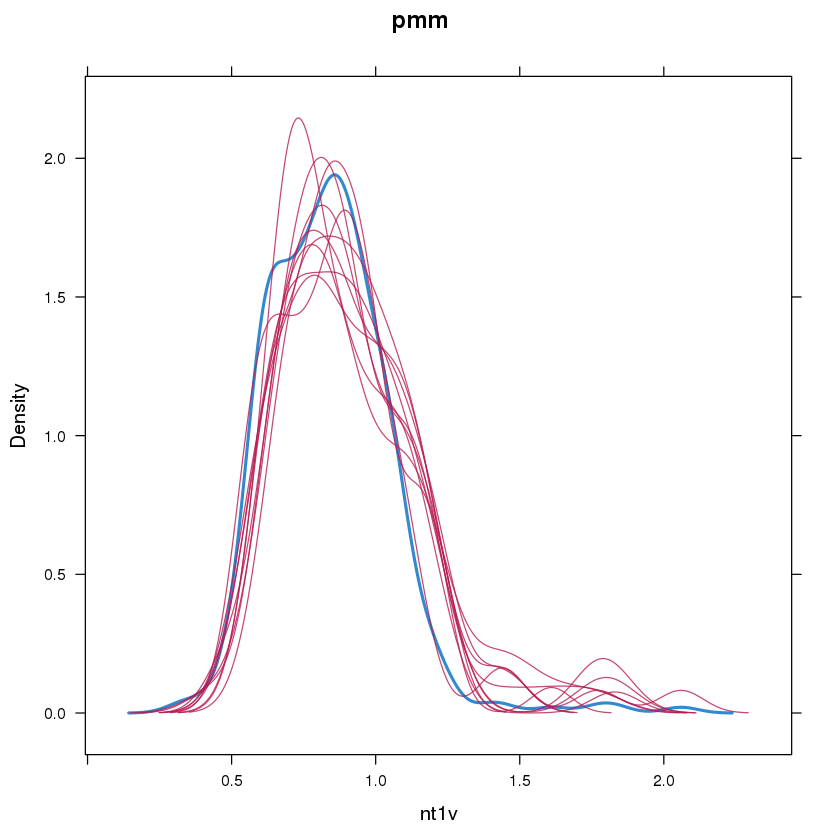

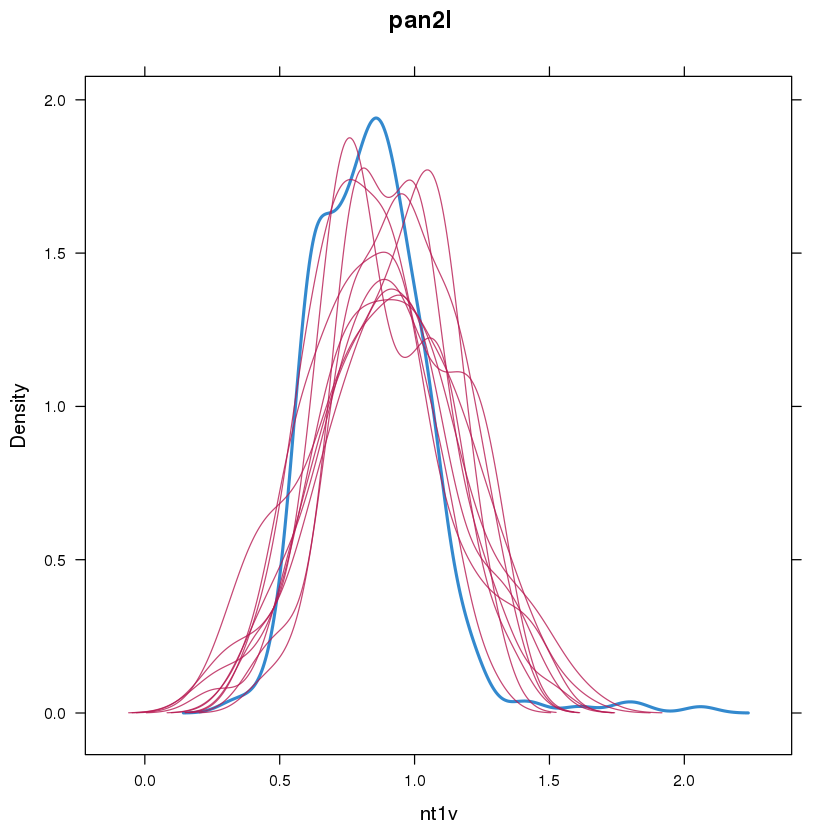

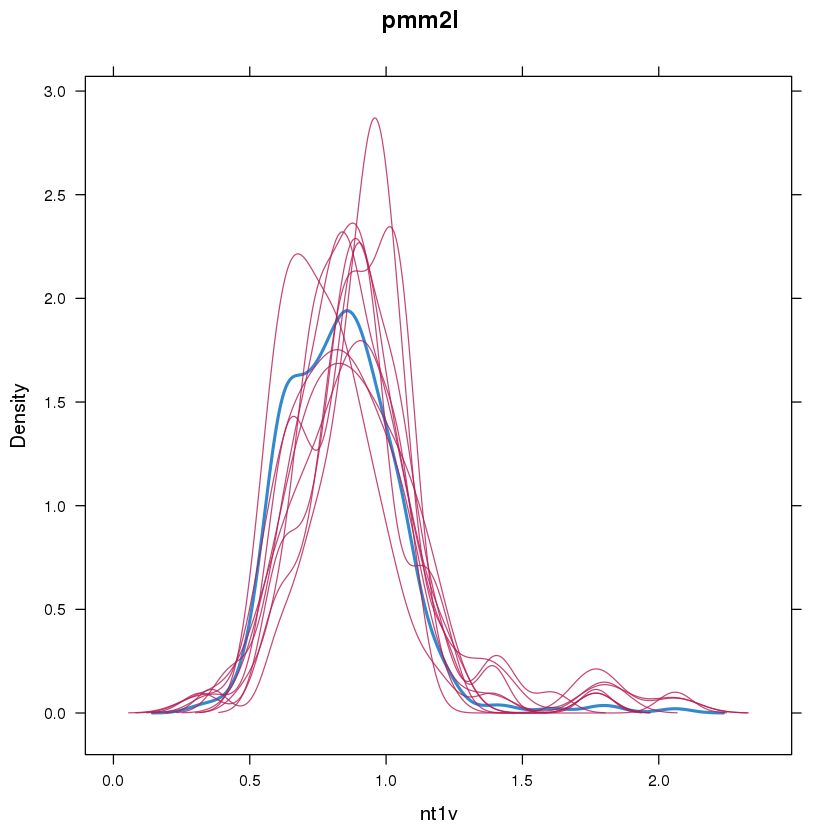

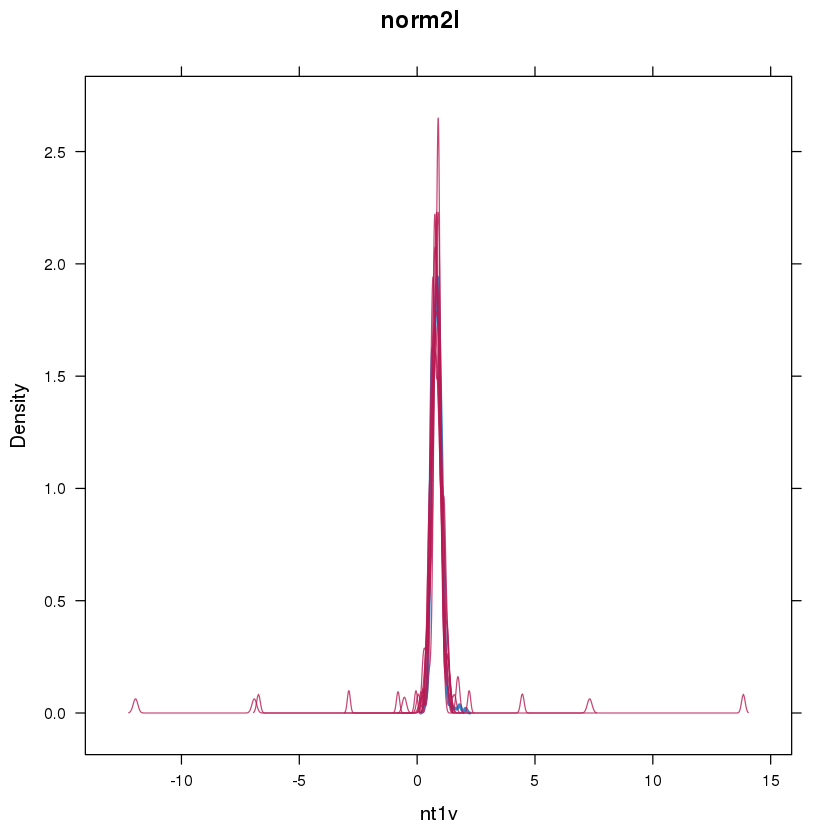

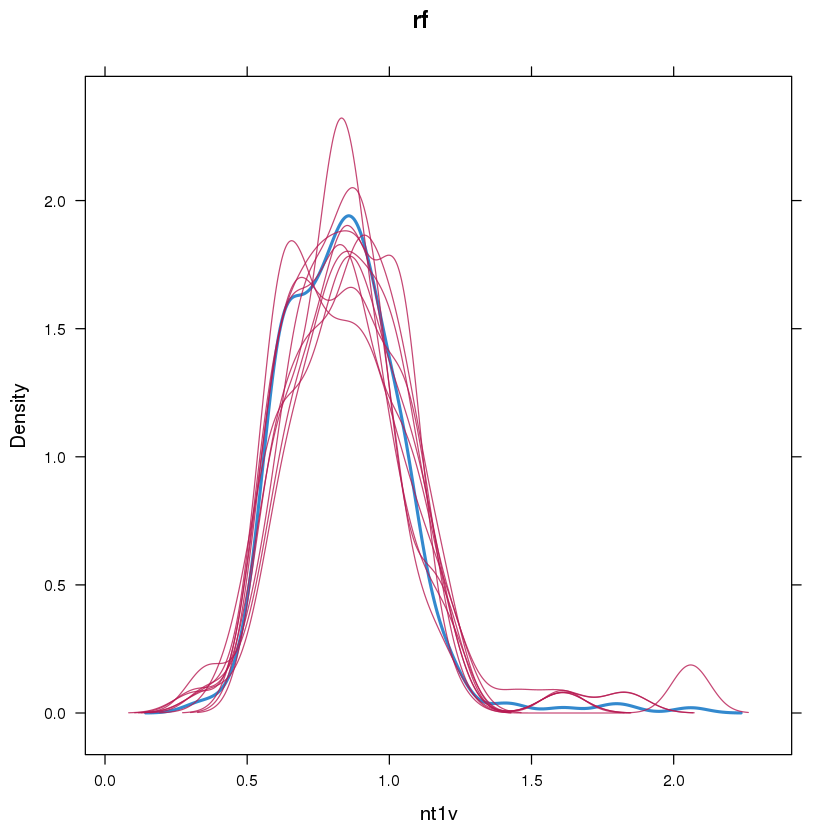

In [29]:
#methods <- c("sample", "pmm", "2l.pan", "2l.norm", "2l.pmm", "rf")
densityplot(sample.result, ~nt1v, main = 'sample')
densityplot(pmm.result, ~nt1v, main = 'pmm')
densityplot(pan2l.result, ~nt1v, main = 'pan2l')
densityplot(pmm2l.result, ~nt1v, main = 'pmm2l')
densityplot(norm2l.result, ~nt1v, main = 'norm2l')
densityplot(rf.result, ~nt1v, main = 'rf')
## not sure which is the best given this one

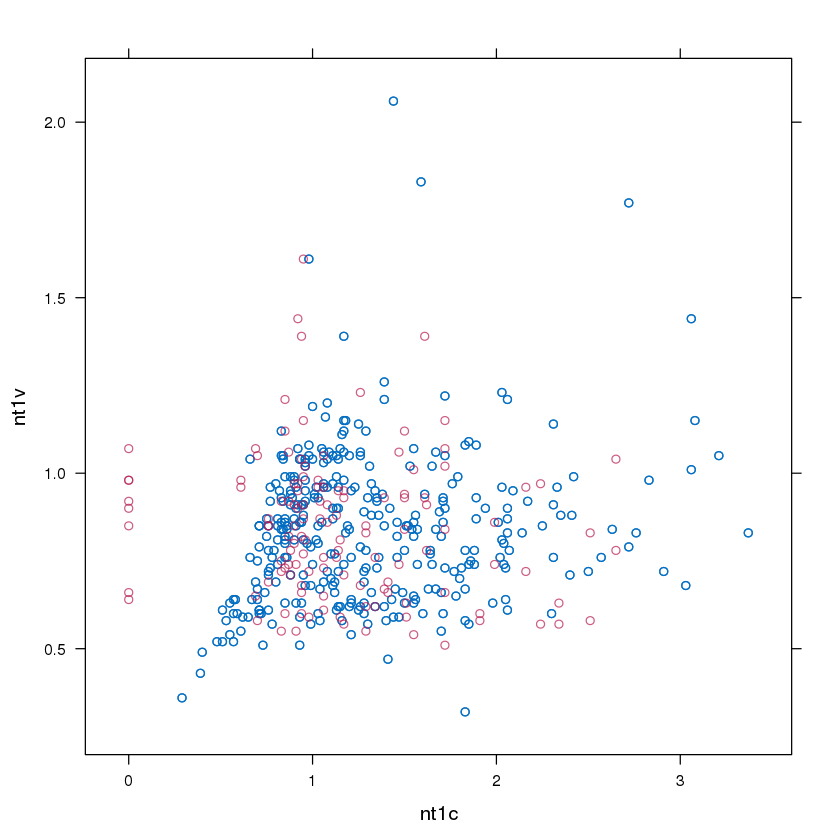

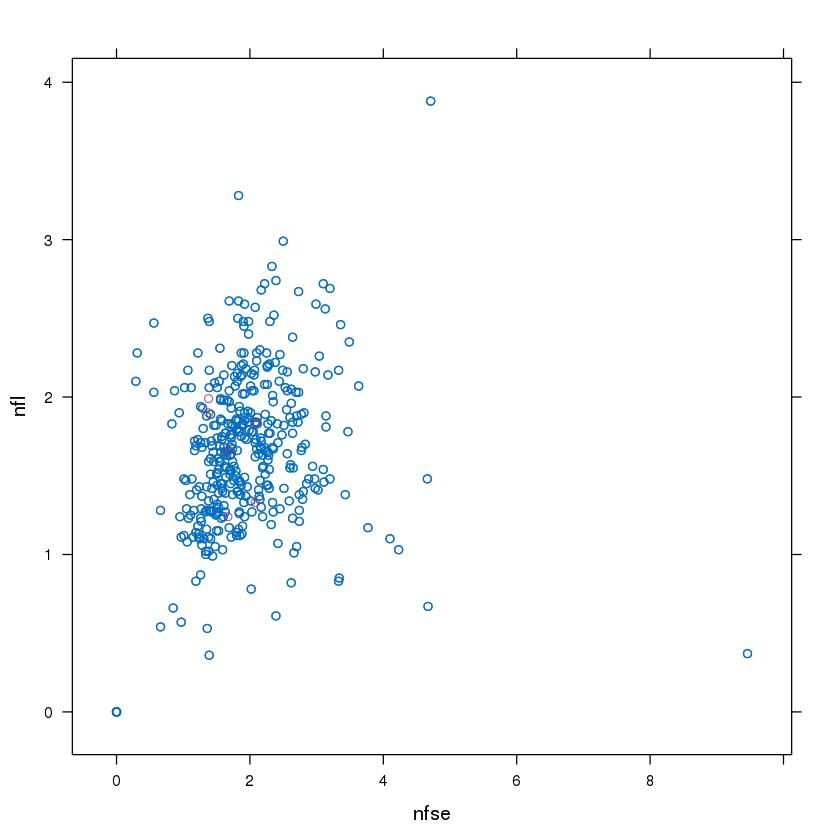

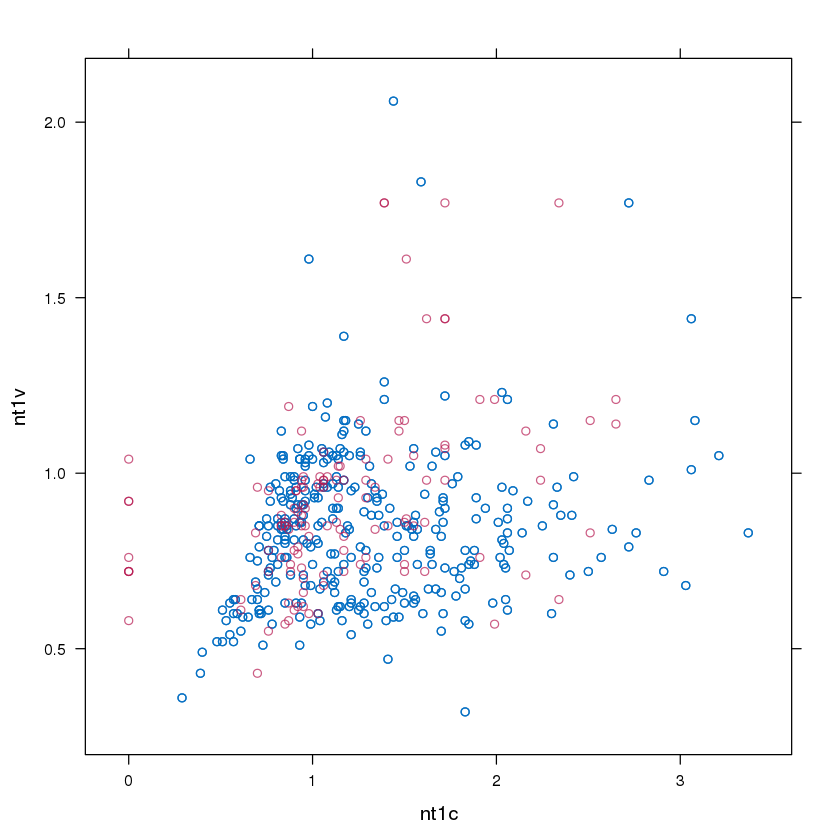

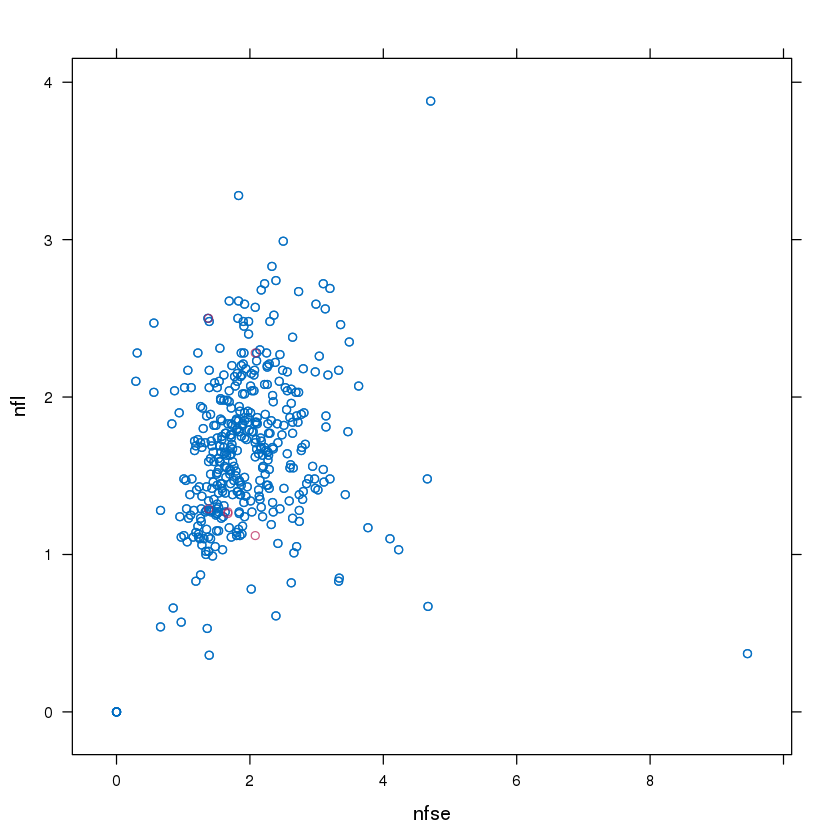

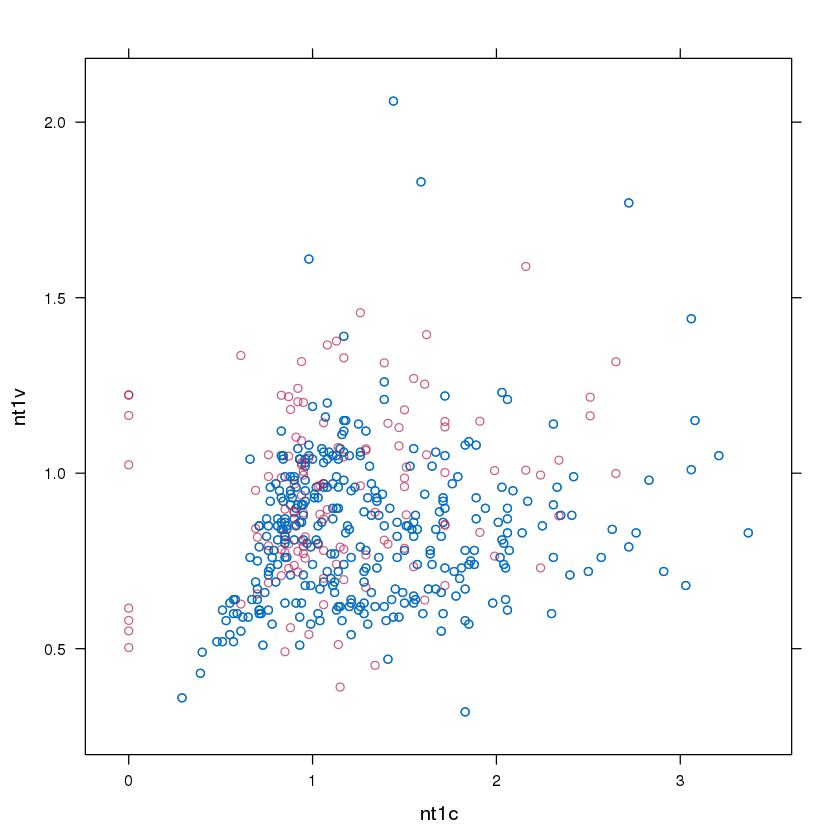

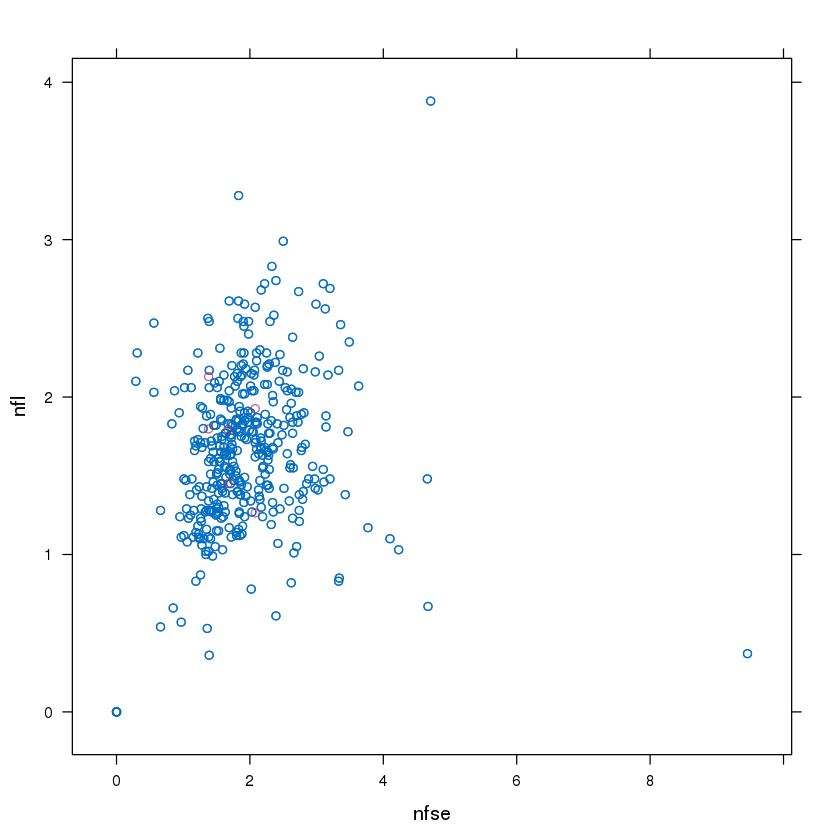

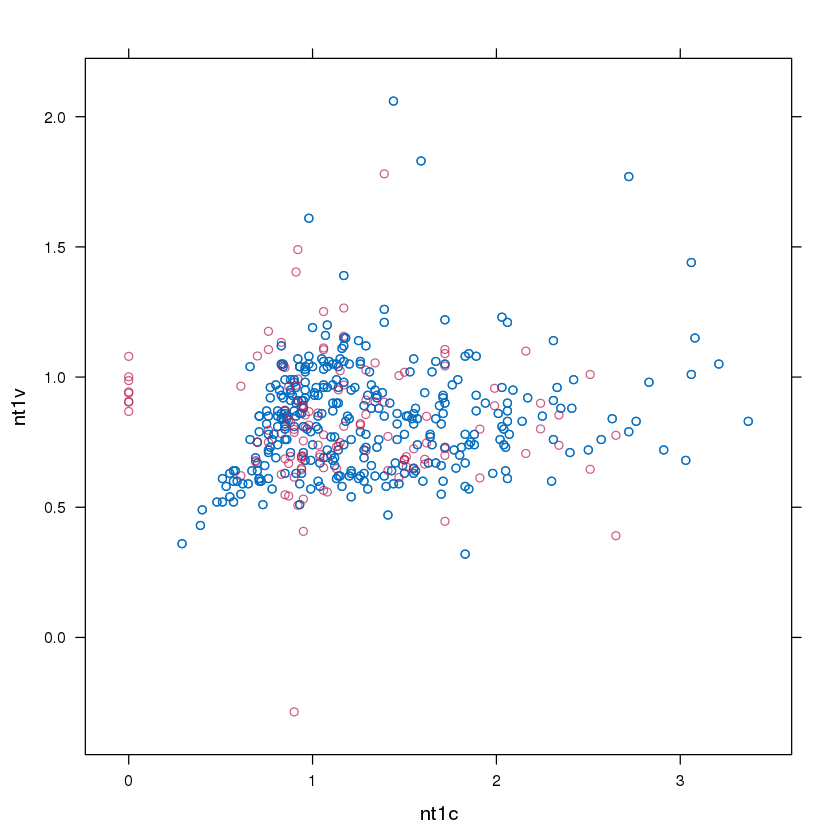

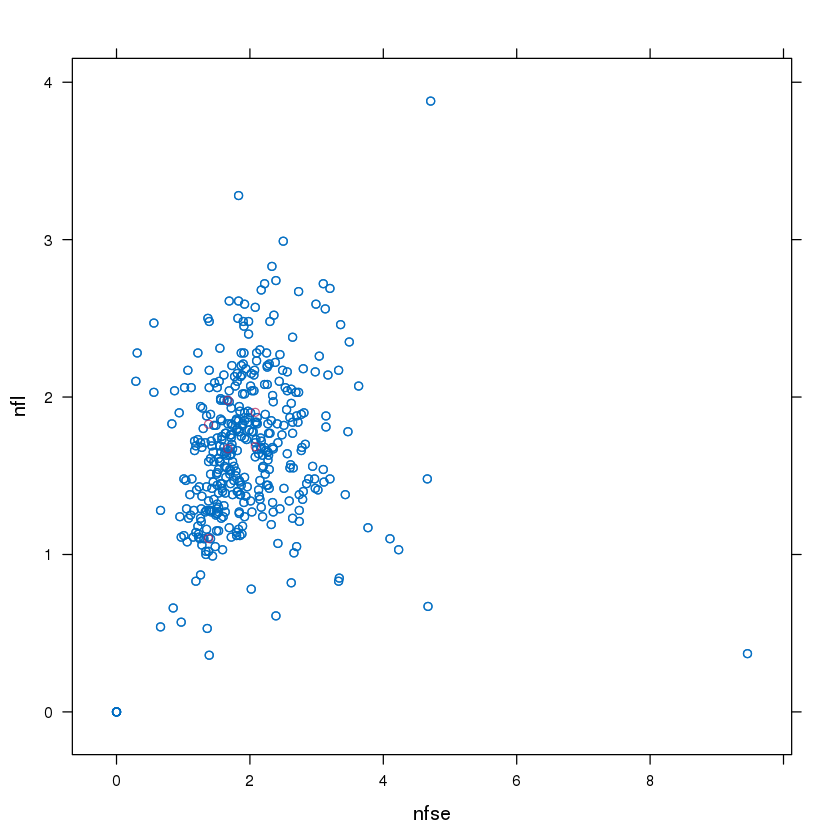

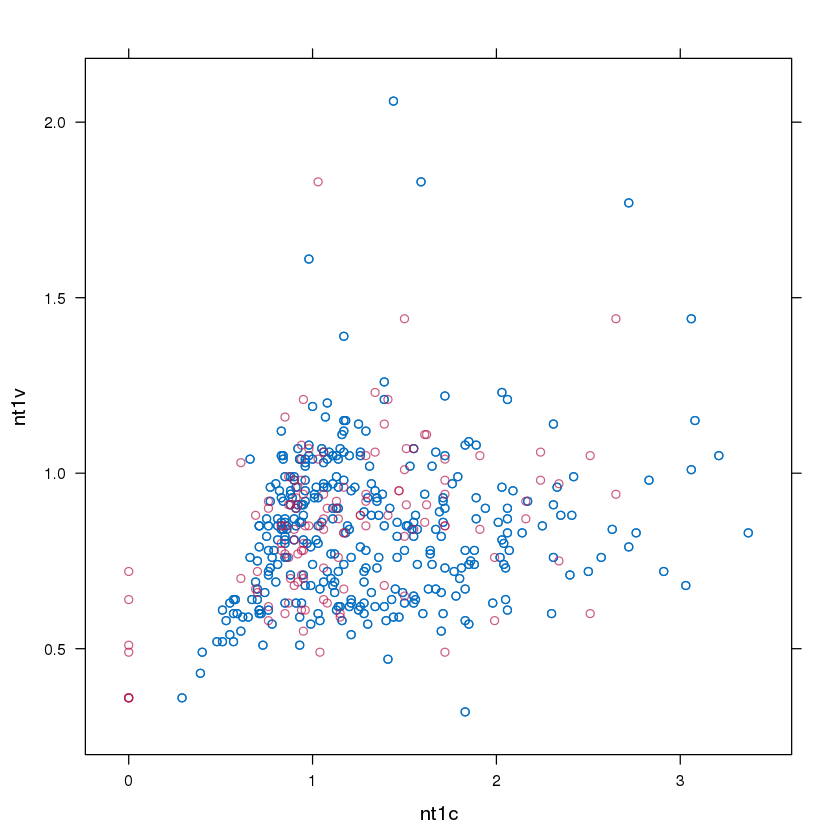

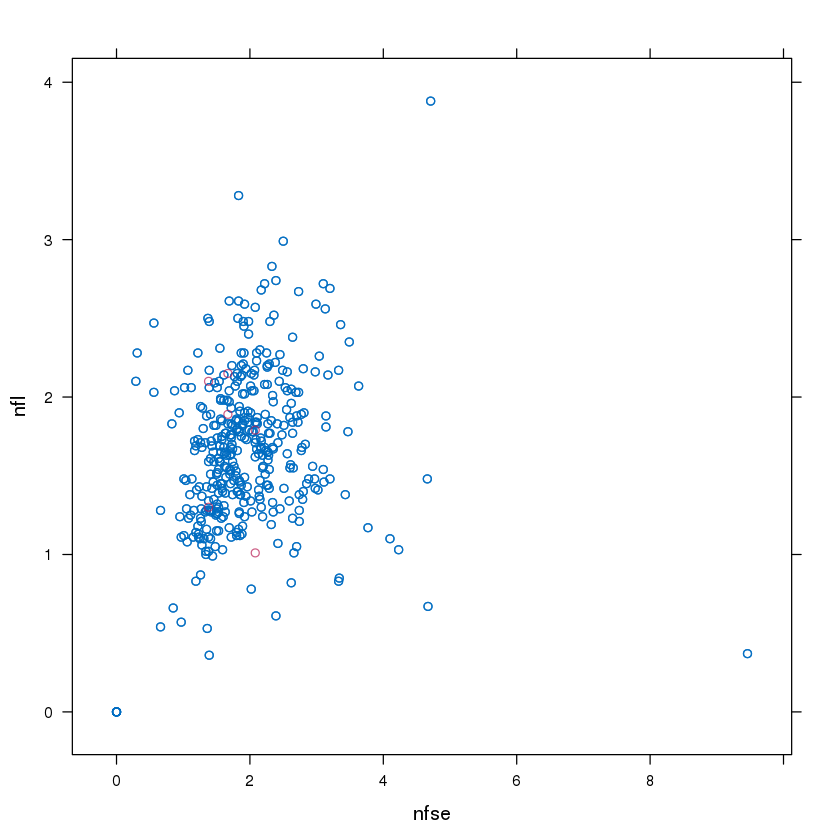

In [65]:
#methods <- c("sample", "pmm", "2l.pan", "2l.norm", "2l.pmm", "rf")
xyplot(sample.result, nt1v~nt1c)
xyplot(sample.result, nfl~nfse)
xyplot(pmm.result, nt1v~nt1c)
xyplot(pmm.result, nfl~nfse)
xyplot(pan2l.result, nt1v~nt1c)
xyplot(pan2l.result, nfl~nfse)
xyplot(norm2l.result, nt1v~nt1c)
xyplot(norm2l.result, nfl~nfse)
xyplot(pmm2l.result, nt1v~nt1c)
xyplot(pmm2l.result, nfl~nfse)


In [67]:
ICC1(aov(nfse ~ as.factor(t_number), data = recgli))
ICC1(aov(nt1c ~ as.factor(t_number), data = recgli))
ICC1(aov(phn_npar ~ as.factor(t_number), data = recgli))
ICC1(aov(cni ~ as.factor(t_number), data = recgli))
ICC1(aov(ncho ~ as.factor(t_number), data = recgli))
ICC1(aov(nadc.1 ~ as.factor(t_number), data = recgli))

[1] 0.411965

[1] 0.3691479

[1] 0.4428149

[1] 0.5244272

[1] 0.4918532

[1] 0.3902221

In [90]:
######### now thinking about how to impute values using larger matrix 

In [69]:
recgli_toimp = recgli[include_vars]
head(recgli_toimp)

t_number,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,in_CEL,in_NEL,in_NEC,in_ROI
6369,2.10,1.84,1.20,0.84,1.31,0.75,1.19,1.28,1.58,1.45,0.66,0.81,0.79,100.00,4.98,3.28,0.24,1.65,0.53,0.41,-0.01,0.27,0.28,1,0,0,1
5317,2.27,1.44,1.88,0.78,1.92,0.68,1.63,1.93,2.34,2.14,2.24,2.25,2.25,98.51,1.56,0.30,0.75,0.86,0.84,0.46,0.61,1.08,0.47,1,0,0,1
7540,2.35,1.97,0.76,0.78,1.34,0.68,1.13,1.34,1.63,1.50,0.58,0.67,0.60,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,1,0,1
5317,2.20,1.56,2.04,0.74,2.04,0.89,1.83,2.12,2.22,2.23,1.71,1.73,1.88,99.20,2.46,1.30,0.55,1.19,0.87,0.59,0.34,0.83,0.49,1,0,0,1
5950,2.07,2.17,1.36,0.76,1.45,0.50,1.26,1.43,1.75,1.60,2.89,1.82,1.74,85.76,5.43,5.09,0.42,1.67,0.55,0.45,0.47,0.91,0.44,0,1,0,1
6709,0.85,0.66,1.99,NA,1.14,NA,NA,NA,NA,NA,0.78,0.79,0.77,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,0,1


In [74]:
predMat = matrix(1, nrow = length(colnames(recgli_toimp)), ncol = length(colnames(recgli_toimp)))
rownames(predMat)= colnames(predMat) = colnames(recgli_toimp)
dim(predMat)
head(predMat)

[1] 28 28

,t_number,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,in_CEL,in_NEL,in_NEC,in_ROI
t_number,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nfse,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nfl,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nt1c,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nt1v,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nadc.1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [75]:
predMat[,'t_number']=-2
head(predMat)

,t_number,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,in_CEL,in_NEL,in_NEC,in_ROI
t_number,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nfse,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nfl,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nt1c,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nt1v,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nadc.1,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [76]:
for(i in 1:dim(predMat)[1]){
    predMat[i,1]=-2
    predMat[i,i]=0
}

In [84]:
head(predMat)

,t_number,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,in_CEL,in_NEL,in_NEC,in_ROI
t_number,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nfse,-2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nfl,-2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nt1c,-2,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nt1v,-2,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
nadc.1,-2,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [83]:
result_big <- vector("list", length(methods))
names(result_big) <- methods
str(recgli_toimp)


'data.frame':	391 obs. of  28 variables:
 $ t_number   : int  6369 5317 7540 5317 5950 6709 7394 6709 7394 7584 ...
 $ nfse       : num  2.1 2.27 2.35 2.2 2.07 0.85 2.42 1.08 4.23 3.34 ...
 $ nfl        : num  1.84 1.44 1.97 1.56 2.17 0.66 1.07 1.23 1.03 0.85 ...
 $ nt1c       : num  1.2 1.88 0.76 2.04 1.36 1.99 1.11 0.95 0.51 1.08 ...
 $ nt1v       : num  0.84 0.78 0.78 0.74 0.76 NA 0.9 NA 0.52 0.72 ...
 $ nadc.1     : num  1.31 1.92 1.34 2.04 1.45 1.14 1.92 1.3 2.9 2.71 ...
 $ nfa.1      : num  0.75 0.68 0.68 0.89 0.5 NA 0.94 NA 0.72 1.28 ...
 $ nev1.1     : num  1.19 1.63 1.13 1.83 1.26 NA 1.69 NA 2.52 2.45 ...
 $ nev2.1     : num  1.28 1.93 1.34 2.12 1.43 NA 1.92 NA 2.94 2.67 ...
 $ nev3.1     : num  1.58 2.34 1.63 2.22 1.75 NA 2.36 NA 3.49 3.25 ...
 $ nevrad.1   : num  1.45 2.14 1.5 2.23 1.6 NA 2.14 NA 3.25 3 ...
 $ cbvn_nlin  : num  0.66 2.24 0.58 1.71 2.89 0.78 0.94 1.09 0.58 1.43 ...
 $ phn_nlin   : num  0.81 2.25 0.67 1.73 1.82 0.79 0.94 0.87 0.5 1.09 ...
 $ phn_npar   : num  

In [1]:
methods <- c("sample", "pmm", "2l.pan", "2l.norm", "2l.pmm", "rf")
for (meth in methods) {
  result_big[[meth]] <- mice(recgli_toimp, pred = pred, meth = meth,
                         m = 2, maxit = 2,
                         print = TRUE, seed = 1)
}

ERROR: Error in mice(recgli_toimp, pred = pred, meth = meth, m = 10, maxit = 2, : could not find function "mice"


In [85]:
methods <- c("sample", "pmm", "2l.pan", "2l.norm", "2l.pmm", "rf")
for (meth in methods) {
  pred <- predMat
  result[[meth]] <- mice(recgli_toimp, pred = pred, meth = meth,
                         m = 2, maxit = 2,
                         print = TRUE, seed = 1)
}

Warning message:
“Number of logged events: 1”Warning message:
“Number of logged events: 1”Warning message:
“Number of logged events: 1”Warning message in rgamma(n.class, n.g/2 + 1/(2 * theta), scale = 2 * theta/(ss * :
“NAs produced”Warning message in rgamma(1, n.class/(2 * theta) + 1, scale = 2 * theta * H/n.class):
“NAs produced”Warning message in rgamma(1, n.class/2 - 1, scale = 2/(n.class * (sigma2.0/H - log(sigma2.0) + :
“NAs produced”

ERROR: Error in chol.default(vv): the leading minor of order 1 is not positive definite
